In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import fetch_california_housing

from geopy.geocoders import Nominatim
import pickle

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import RandomizedSearchCV

import lzma

In [2]:
data = fetch_california_housing()

In [3]:
data

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars

In [4]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
df = pd.DataFrame(data = data.data, columns = data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
df.shape

(20640, 8)

In [7]:
df['Target'] = data.target

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### **EDA**

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


All columns have float data type

**Missing values**

In [11]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

There are no null values in the dataset

In [12]:
discrete_feature=[feature for feature in df if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


There are no discrete numerical values

In [13]:
continuous_feature=[feature for feature in df if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 9


All values are continuous numerical values

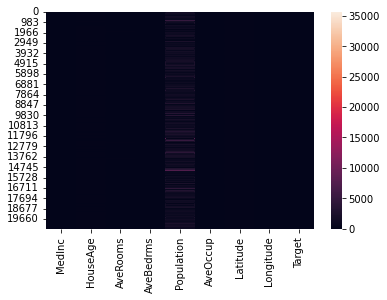

In [14]:
sns.heatmap(df)

**Exploring MedInc**

In [15]:
df['MedInc'].head()

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: MedInc, dtype: float64

In [16]:
df['MedInc'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64

In [17]:
df['MedInc'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


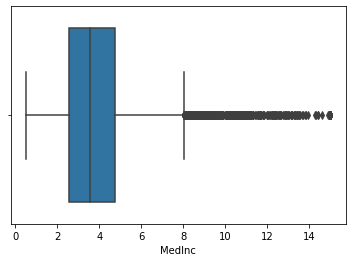

In [18]:
sns.boxplot(df['MedInc'])

In [19]:
Q1 = df['MedInc'].quantile(0.25)
Q3 = df['MedInc'].quantile(0.75)
IQR = Q3 - Q1
((df['MedInc'] < (Q1 - 1.5 * IQR)) | (df['MedInc'] > (Q3 + 1.5 * IQR))).sum()

681

There are 681 outliers

(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <a list of 10 Patch objects>)

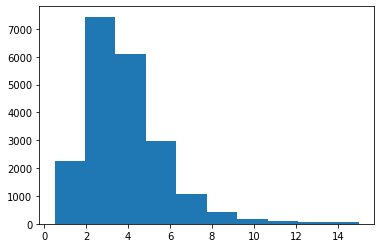

In [20]:
plt.hist(df['MedInc'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


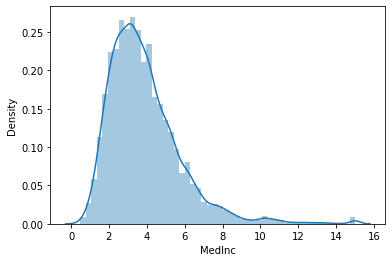

In [21]:
sns.distplot(df['MedInc'])

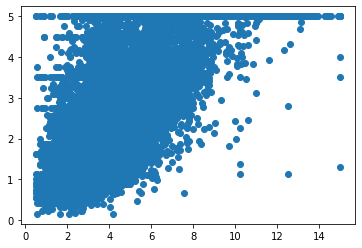

In [22]:
plt.scatter(x=df['MedInc'], y=df['Target'])

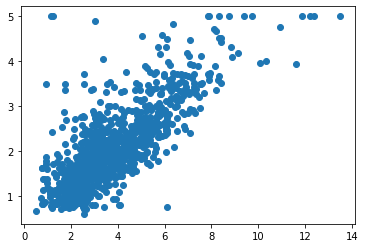

In [23]:
plt.scatter(x=df['MedInc'][:1001], y=df['Target'][:1001])

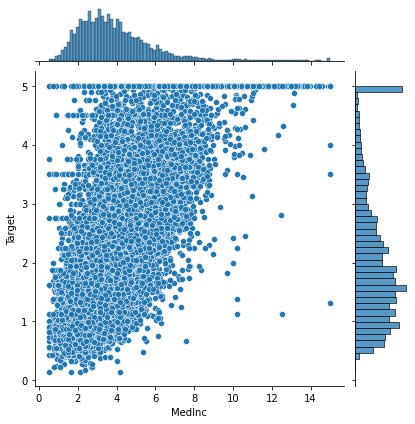

In [24]:
sns.jointplot(x=df['MedInc'], y=df['Target'], data=df)

In [25]:
cormat = df.corr()
cormat

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Assumption:
1. The correlation between averooms and avebedrms is very high. So, there can be a chance to drop any of the two to avoid multicollinearity
2. Since there is a high positive relation between MedInc and Target so we may keep MedInc (based on further feature selection)

**Exploring latitude and longitude**

In [26]:
df['Latitude'].head()

0    37.88
1    37.86
2    37.85
3    37.85
4    37.85
Name: Latitude, dtype: float64

In [27]:
df['Latitude'].shape

(20640,)

In [28]:
df['Longitude'].head()

0   -122.23
1   -122.22
2   -122.24
3   -122.25
4   -122.25
Name: Longitude, dtype: float64

In [29]:
df_lat = [x for x in df['Latitude'] if x>0]
len(df_lat)

20640

In [30]:
df_lon = [x for x in df['Longitude'] if x>0]
len(df_lon)

0

**Getting location from latitude and longitude and storing it in dataframe**

In [31]:
geoLoc = Nominatim(user_agent="GetLoc")

In [32]:
def address():
  x = []
  for i in range(len(df['Latitude'])):
    x.append([df['Latitude'][i], df['Longitude'][i]])
  return x

In [33]:
def get_location():
  coord = address()
  location = {
      "Country": [],
      "County": [],
      "City": [],
      "State": [],
      "Road": []
  }

  for i in range(len(coord)):
    x = geoLoc.reverse(str(coord[i][0])+","+ str(coord[i][1])).raw['address'] # raw returns a dictionary of with all the description of address

    if x.get('country') is None:
      x['country'] = None
        
    if x.get('county') is None:
      x['county'] = None

    if x.get('state') is None:
      x['state'] = None

    if x.get('road') is None:
      x['road'] = None

    if x.get('city') is None:
      x['city'] = None

    location['Country'].append(x['country'])
    location['County'].append(x['county'])
    location['State'].append(x['state'])
    location['Road'].append(x['road'])
    location['City'].append(x['city'])

    pickle.dump(location, open('location.pickle', 'wb')) # we are using pickle because dataset is very large (20000 rows), so to not run it again and again we are dumping it in a file

    if i%100==0:
      print(i)

In [34]:
# get_location()

In [35]:
location = pickle.load(open("/content/location.pickle", "rb"))
location.keys()

dict_keys(['Country', 'County', 'City', 'State', 'Road'])

In [36]:
df_loc = pd.DataFrame(location) # this is dataframe to have a look at the missing values in location

In [37]:
df_loc.head()

,Country,County,City,State,Road
0,United States,Alameda County,Oakland,California,Upper Side Hill entrance
1,United States,Alameda County,Oakland,California,Charing Cross Road
2,United States,Alameda County,Oakland,California,Grove Shafter Freeway
3,United States,Alameda County,Oakland,California,Florio Street
4,United States,Alameda County,Oakland,California,Florio Street


In [38]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  20640 non-null  object
 1   County   20065 non-null  object
 2   City     12654 non-null  object
 3   State    20640 non-null  object
 4   Road     19574 non-null  object
dtypes: object(5)
memory usage: 806.4+ KB


In [39]:
df_loc.isnull().sum()

Country       0
County      575
City       7986
State         0
Road       1066
dtype: int64

**Exploring Countries**

In [40]:
df_loc['Country'].value_counts()

United States    20639
México               1
Name: Country, dtype: int64

All the values are from united states except one

In [41]:
df_loc[df_loc['Country'] == 'México']

,Country,County,City,State,Road
14762,México,Municipio de Tijuana,Tijuana,Baja California,Calle Ingeniero Fernando Sánchez Ayala


**Exploring States**

In [42]:
df_loc['State'].value_counts()

California         20636
Nevada                 1
Oregon                 1
Arizona                1
Baja California        1
Name: State, dtype: int64

Most of the values are from California except 4

In [43]:
df_loc[df_loc['State'] == 'Nevada']

,Country,County,City,State,Road
1866,United States,Douglas County,None,Nevada,US 50


In [44]:
df_loc[df_loc['State'] == 'Oregon']

,Country,County,City,State,Road
9663,United States,Lake County,None,Oregon,Westside Road


In [45]:
df_loc[df_loc['State'] == 'Arizona']

,Country,County,City,State,Road
12447,United States,La Paz County,None,Arizona,None


In [46]:
df_loc[df_loc['State'] == 'Baja California']

,Country,County,City,State,Road
14762,México,Municipio de Tijuana,Tijuana,Baja California,Calle Ingeniero Fernando Sánchez Ayala


**Exploring County**

In [47]:
df_loc['County'].isnull().sum()

575

In [48]:
df_loc['County'].unique()

array(['Alameda County', 'Contra Costa County', 'Alpine County',
       'Amador County', 'Butte County', 'Calaveras County',
       'Colusa County', 'Solano County', 'Marin County',
       'Del Norte County', 'Douglas County', 'El Dorado County',
       'Fresno County', 'Tulare County', 'Glenn County',
       'Humboldt County', 'Imperial County', 'Inyo County', 'Kern County',
       'Kings County', 'Lake County', 'Sonoma County', 'Lassen County',
       'Los Angeles County', 'San Bernardino County', 'Orange County',
       'Ventura County', 'Madera County', 'Mariposa County',
       'Mendocino County', 'Merced County', 'Modoc County', 'Mono County',
       'Monterey County', 'San Benito County', 'Napa County',
       'Nevada County', 'San Diego County', 'Placer County',
       'Plumas County', 'Riverside County', 'La Paz County',
       'Sacramento County', 'Municipio de Tijuana', None,
       'San Joaquin County', 'San Luis Obispo County', 'San Mateo County',
       'Santa Clara Count

In [49]:
df_loc['County'].nunique()

60

**Exploring Cities**

In [50]:
df_loc['City'].isnull().sum()

7986

In [51]:
df_loc['City'].nunique()

214

**Exploring Road**

In [52]:
df_loc['Road'].isnull().sum()

1066

In [53]:
df_loc['Road'].value_counts()

San Diego Freeway         36
West Manchester Avenue    35
Main Street               30
South Normandie Avenue    29
Hazeltine Avenue          28
                          ..
The Shops Boulevard        1
Cambria                    1
Felipe Road                1
Forest View                1
Marysville Road            1
Name: Road, Length: 9140, dtype: int64

Now, since we have explored all the columns of df_loc, we will append it in the original dataframe and then visualize it with the dependent variable. Also, we will drop latitude and longitude columns from original dataframe. Moreover, we will take a model with which we can handle the missing values in categorical columns and side by side predict the target value

In [54]:
df_loc.columns

Index(['Country', 'County', 'City', 'State', 'Road'], dtype='object')

In [55]:
df['Country'] = df_loc['Country']
df['County'] = df_loc['County']
df['State'] = df_loc['State']
df['Road'] = df_loc['Road']
df['City'] = df_loc['City']

In [56]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,Country,County,State,Road,City
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,United States,Alameda County,California,Upper Side Hill entrance,Oakland
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,United States,Alameda County,California,Charing Cross Road,Oakland
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,United States,Alameda County,California,Grove Shafter Freeway,Oakland
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,United States,Alameda County,California,Florio Street,Oakland
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,United States,Alameda County,California,Florio Street,Oakland


In [57]:
df.drop(columns=['Latitude', 'Longitude'], axis=1, inplace=True)

In [58]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target,Country,County,State,Road,City
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526,United States,Alameda County,California,Upper Side Hill entrance,Oakland
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585,United States,Alameda County,California,Charing Cross Road,Oakland
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521,United States,Alameda County,California,Grove Shafter Freeway,Oakland
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413,United States,Alameda County,California,Florio Street,Oakland
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422,United States,Alameda County,California,Florio Street,Oakland


In [59]:
column_to_reorder = df.pop('Target')
df.insert(len(df. columns), 'Target', column_to_reorder)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Country,County,State,Road,City,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,United States,Alameda County,California,Upper Side Hill entrance,Oakland,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,United States,Alameda County,California,Charing Cross Road,Oakland,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,United States,Alameda County,California,Grove Shafter Freeway,Oakland,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,United States,Alameda County,California,Florio Street,Oakland,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,United States,Alameda County,California,Florio Street,Oakland,3.422


***Which country has how much median prices***

In [60]:
df[['Country','Target']].groupby(['Country','Target']).size().reset_index()

,Country,Target,0
0,México,0.67500,1
1,United States,0.14999,4
2,United States,0.17500,1
3,United States,0.22500,4
4,United States,0.25000,1
...,...,...,...
3838,United States,4.98800,1
3839,United States,4.99000,1
3840,United States,4.99100,1
3841,United States,5.00000,27


***which country has highest median prices***

In [61]:
df[['Country','Target']].groupby(['Country']).size().reset_index()

,Country,0
0,México,1
1,United States,20639


United States has highest median income

***Which county has how much median prices***

In [62]:
df[['County','Target']].groupby(['County','Target']).size().reset_index()

,County,Target,0
0,Alameda County,0.600,1
1,Alameda County,0.675,1
2,Alameda County,0.700,1
3,Alameda County,0.713,1
4,Alameda County,0.720,1
...,...,...,...
13652,Yuba County,1.083,1
13653,Yuba County,1.120,1
13654,Yuba County,1.156,1
13655,Yuba County,1.168,1


***Which road has highest median prices and it belongs to which county***

In [63]:
df[['County','Road','Target']].groupby(['County','Road']).size().reset_index().sort_values(by=[0], ascending=False)

,County,Road,0
3571,Los Angeles County,West Manchester Avenue,35
3304,Los Angeles County,South Normandie Avenue,29
2527,Los Angeles County,Hazeltine Avenue,28
2994,Los Angeles County,Pacific Coast Highway,27
3597,Los Angeles County,West Washington Boulevard,24
...,...,...,...
4466,Orange County,East Constantine Road,1
4465,Orange County,East Carpenter Avenue,1
4464,Orange County,East Carleton Avenue,1
4463,Orange County,East Camino Vista,1


This means that West Manchester Avenue road of Los Angeles County has highest median prices value count

***Which Road has how much median prices***


In [64]:
df[['Road','Target']].groupby(['Road','Target']).size().reset_index()

,Road,Target,0
0,(private),2.470,1
1,100,0.833,1
2,103 Trail,2.832,1
3,105th Avenue,0.764,1
4,105th Avenue,0.797,1
...,...,...,...
19193,Zuckerman Court,1.179,1
19194,la Paz Drive,2.766,1
19195,la Paz Drive,3.068,1
19196,la Paz Drive,3.526,1


***Which State has how much median prices***



In [65]:
df[['State','Target']].groupby(['State','Target']).size().reset_index()

,State,Target,0
0,Arizona,0.87500,1
1,Baja California,0.67500,1
2,California,0.14999,4
3,California,0.17500,1
4,California,0.22500,4
...,...,...,...
3841,California,4.99100,1
3842,California,5.00000,27
3843,California,5.00001,965
3844,Nevada,2.12500,1


In [66]:
df[['Country', 'County', 'State','Road', 'City', 'Target']].groupby(['Country', 'County', 'State','Road','City', 'Target']).size().reset_index()

,Country,County,State,Road,City,Target,0
0,México,Municipio de Tijuana,Baja California,Calle Ingeniero Fernando Sánchez Ayala,Tijuana,0.675,1
1,United States,Alameda County,California,105th Avenue,Oakland,0.764,1
2,United States,Alameda County,California,105th Avenue,Oakland,0.797,1
3,United States,Alameda County,California,105th Avenue,Oakland,0.800,1
4,United States,Alameda County,California,105th Avenue,Oakland,0.824,1
...,...,...,...,...,...,...,...
11582,United States,Yolo County,California,G Street,Davis,1.826,1
11583,United States,Yolo County,California,Mulberry Lane,Davis,2.194,1
11584,United States,Yolo County,California,Peregrine Avenue,Davis,2.018,1
11585,United States,Yolo County,California,Pomona Drive,Davis,1.308,1


In [67]:
df[['County','Road','Population','Target']].groupby(['County','Road','Population', 'Target']).size().reset_index().sort_values(by=['Road','County', 'Population']).head(20)

,County,Road,Population,Target,0
15267,San Luis Obispo County,(private),1795.0,2.47000,1
3010,Lake County,100,461.0,0.83300,1
18539,Ventura County,103 Trail,934.0,2.83200,1
0,Alameda County,105th Avenue,435.0,0.79700,1
1,Alameda County,105th Avenue,646.0,0.80000,1
2,Alameda County,105th Avenue,855.0,0.76400,1
3,Alameda County,105th Avenue,2736.0,0.82400,1
3080,Los Angeles County,107th Street West,884.0,2.64900,1
2596,Kern County,10th Avenue,1764.0,0.67800,1
11308,Riverside County,10th Avenue,671.0,0.74000,1


In [68]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Country', 'County', 'State', 'Road', 'City', 'Target'],
      dtype='object')

In [69]:
df[['County','Road','HouseAge', 'Target']].groupby(['County','Road','HouseAge', 'Target']).size().reset_index()

,County,Road,HouseAge,Target,0
0,Alameda County,105th Avenue,42.0,0.800,1
1,Alameda County,105th Avenue,42.0,0.824,1
2,Alameda County,105th Avenue,43.0,0.764,1
3,Alameda County,105th Avenue,44.0,0.797,1
4,Alameda County,10th Street,10.0,1.375,1
...,...,...,...,...,...
18950,Yuba County,Twain Drive,23.0,0.575,1
18951,Yuba County,Twain Drive,26.0,0.580,1
18952,Yuba County,Vierra Road,18.0,0.847,1
18953,Yuba County,Walnut Avenue,27.0,0.983,1


From this we can see that even if all the independent values are same, the target variable may differ. Example: index 0 and 1

**Exploring House Age**

In [70]:
df['HouseAge'].head()

0    41.0
1    21.0
2    52.0
3    52.0
4    52.0
Name: HouseAge, dtype: float64

In [71]:
df['HouseAge'].value_counts(sort=True)

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: HouseAge, dtype: int64

In [72]:
df['HouseAge'].unique()

array([41., 21., 52., 42., 50., 40., 49., 48., 51., 43.,  2., 46., 26.,
       20., 17., 36., 19., 23., 38., 35., 10., 16., 27., 39., 31., 29.,
       22., 37., 28., 34., 32., 47., 44., 30., 18., 45., 33., 24., 15.,
       14., 13., 25.,  5., 12.,  6.,  8.,  9.,  7.,  3.,  4., 11.,  1.])

In [73]:
df['HouseAge'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


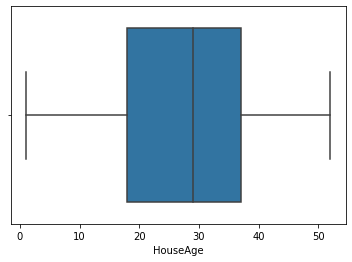

In [74]:
sns.boxplot(df['HouseAge'])

There are no outliers

In [75]:
Q1 = df['HouseAge'].quantile(0.25)
Q3 = df['HouseAge'].quantile(0.75)
IQR = Q3 - Q1
((df['HouseAge'] < (Q1 - 1.5 * IQR)) | (df['HouseAge'] > (Q3 + 1.5 * IQR))).sum()

0

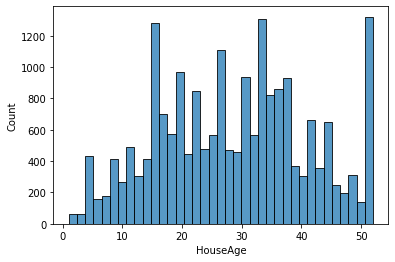

In [76]:
sns.histplot(df['HouseAge'])

In [77]:
cormat['Target'].sort_values(ascending=False)

Target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64

In [78]:
df['HouseAge'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64

In [79]:
df[['HouseAge','Target']].groupby(['HouseAge','Target']).size().reset_index().head(50).sort_values(by=['HouseAge','Target'])

,HouseAge,Target,0
0,1.0,0.550,1
1,1.0,1.417,1
2,1.0,1.892,1
3,1.0,1.913,1
4,2.0,0.475,1
5,2.0,0.600,1
6,2.0,0.965,1
7,2.0,1.000,1
8,2.0,1.111,1
9,2.0,1.115,1


Same houseage may have different number of median prices

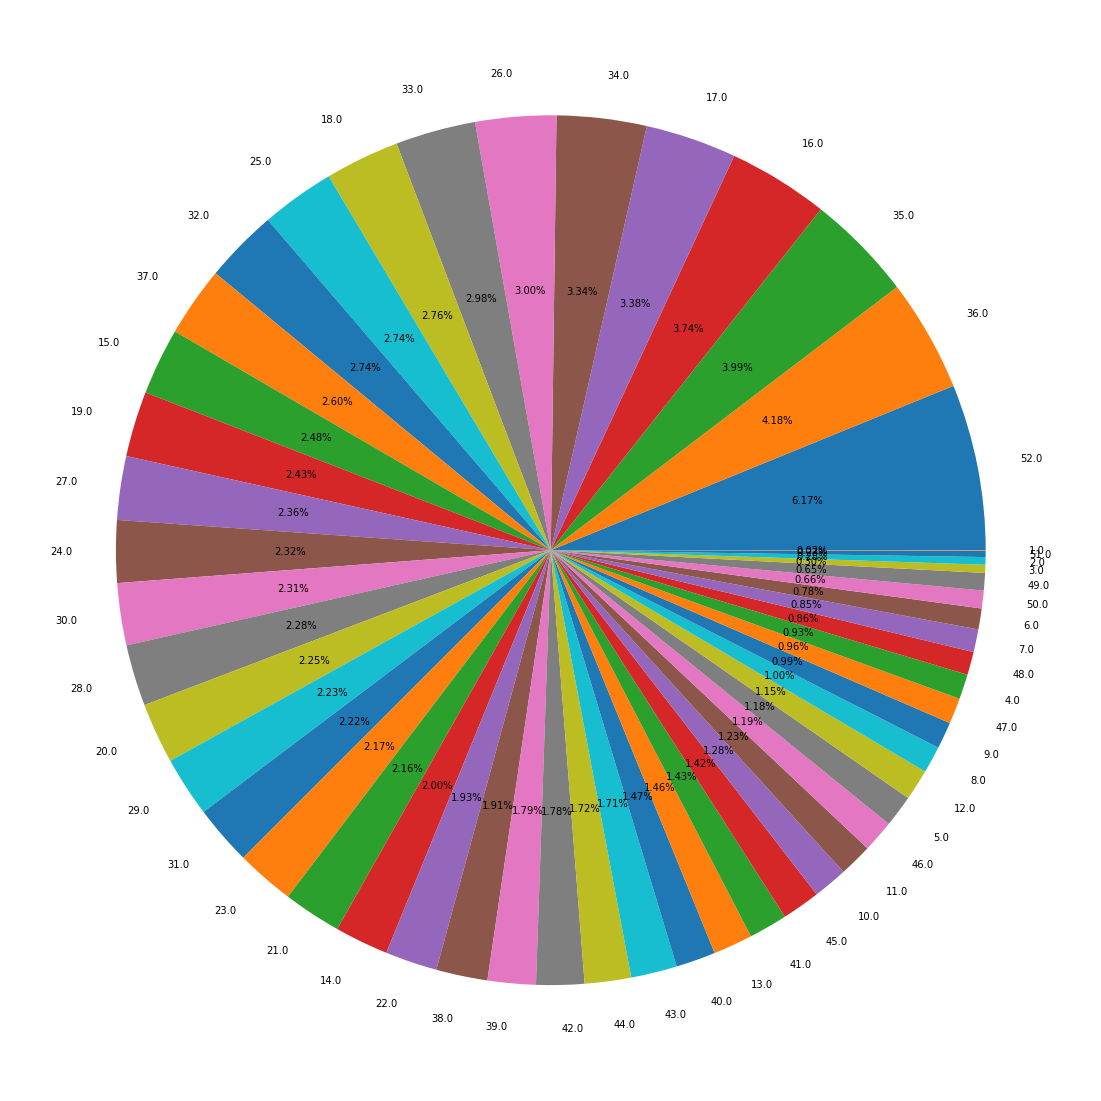

In [80]:
plt.figure(figsize = (45, 20))
plt.pie(df['HouseAge'].value_counts(),labels= df['HouseAge'].value_counts().index,autopct="%.2f%%")
plt.show()

Most of the houses (~6%) have a house age of 52 followed by 36 (4.18%)

(array([ 719., 1104., 2235., 2681., 2510., 2354., 3555., 1900., 1616.,
        1966.]),
 array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ]),
 <a list of 10 Patch objects>)

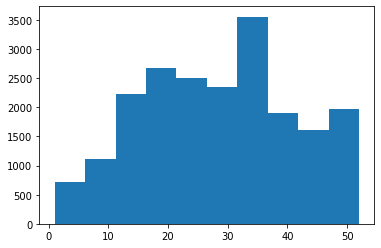

In [81]:
plt.hist(df['HouseAge'])

Most of the House ages lie between 32 to 38

**Exploring AveRooms**

In [82]:
df['AveRooms'].describe()

count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64

In [83]:
df['AveRooms'].nunique()

19392

In [84]:
df[['AveRooms','Target']].groupby(['AveRooms','Target']).size().reset_index().head(50).sort_values(by=['AveRooms']).head()

,AveRooms,Target,0
0,0.846154,1.625,1
1,0.888889,1.125,1
2,1.000000,1.375,1
3,1.130435,1.250,1
4,1.130435,1.875,1


In [85]:
df[['HouseAge','AveRooms','Target']].groupby(['HouseAge','AveRooms','Target']).size().reset_index().head(50).sort_values(by=['AveRooms', 'HouseAge'], ascending=False).head()

,HouseAge,AveRooms,Target,0
3,1.0,20.125000,1.892,1
49,2.0,9.080460,1.665,1
48,2.0,8.930716,1.644,1
47,2.0,8.834825,1.878,1
46,2.0,8.821216,1.773,1


(array([2.0531e+04, 8.2000e+01, 1.7000e+01, 5.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  0.84615385,  14.95244755,  29.05874126,  43.16503497,
         57.27132867,  71.37762238,  85.48391608,  99.59020979,
        113.6965035 , 127.8027972 , 141.90909091]),
 <a list of 10 Patch objects>)

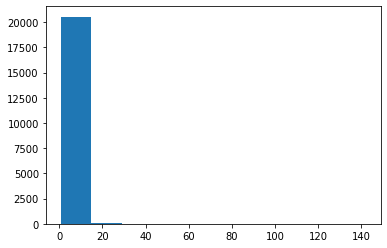

In [86]:
plt.hist(df['AveRooms'])

Most of the values of average rooms are less than 20

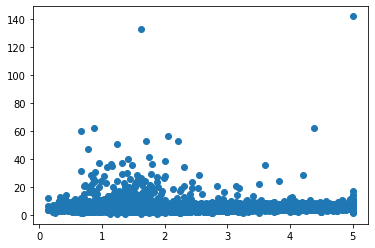

In [87]:
plt.scatter(df['Target'], df['AveRooms'])

Most of the values of average rooms less than 40 contribute to the major part of the target variable

In [88]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Country', 'County', 'State', 'Road', 'City', 'Target'],
      dtype='object')

**Exploring AveBedrms**

In [89]:
df['AveBedrms'].describe()

count    20640.000000
mean         1.096675
std          0.473911
min          0.333333
25%          1.006079
50%          1.048780
75%          1.099526
max         34.066667
Name: AveBedrms, dtype: float64

In [90]:
df['AveBedrms'].isnull().sum()

0

In [91]:
df['AveBedrms'].nunique()

14233

In [92]:
df[['AveBedrms','Target']].groupby(['AveBedrms','Target']).size().reset_index().sort_values(by=["AveBedrms"]).head(10)

,AveBedrms,Target,0
0,0.333333,2.75000,1
1,0.375000,2.50000,1
2,0.444444,0.80000,1
3,0.500000,1.12500,1
4,0.500000,2.75000,1
5,0.500000,5.00001,1
6,0.526316,2.50000,1
7,0.531250,0.93800,1
8,0.545455,2.12500,1
9,0.555556,1.18800,1


Even if 2 average bedrooms have same value, there can be diiferent mean prices

In [93]:
df[['County', 'AveBedrms']].groupby(['County']).size().reset_index().sort_values(by=[0], ascending=False).head()

,County,0
20,Los Angeles County,5821
32,Orange County,1622
39,San Diego County,1609
0,Alameda County,1020
44,Santa Clara County,1003


Most of the average bedrooms were present in Los Angeles County followed by Orange County



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


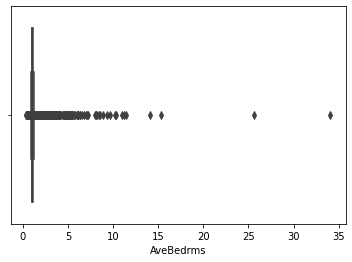

In [94]:
sns.boxplot(df['AveBedrms'])

There are many outliers present

In [95]:
Q1 = df['AveBedrms'].quantile(0.25)
Q3 = df['AveBedrms'].quantile(0.75)
IQR = Q3 - Q1
((df['AveBedrms'] < (Q1 - 1.5 * IQR)) | (df['AveBedrms'] > (Q3 + 1.5 * IQR))).sum()

1424

There are 1424 outliers present in the column

In [96]:
cormat['Target']

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Target        1.000000
Name: Target, dtype: float64

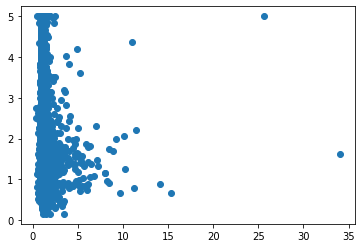

In [97]:
plt.scatter(df['AveBedrms'], df['Target'])

Most of the values that lie between 0 to 5 contribute majorly to the median price

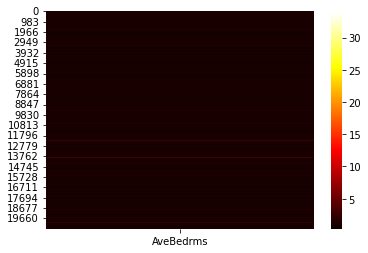

In [98]:
sns.heatmap(df[['AveBedrms']], cmap="hot")

**Exploring Average Occupation (Number of household members)**

In [99]:
df['AveOccup'].describe()

count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: AveOccup, dtype: float64

In [100]:
df['AveOccup'].isnull().sum()

0

In [101]:
df['AveOccup'].nunique()

18841

(array([2.0636e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([6.92307692e-01, 1.24956410e+02, 2.49220513e+02, 3.73484615e+02,
        4.97748718e+02, 6.22012821e+02, 7.46276923e+02, 8.70541026e+02,
        9.94805128e+02, 1.11906923e+03, 1.24333333e+03]),
 <a list of 10 Patch objects>)

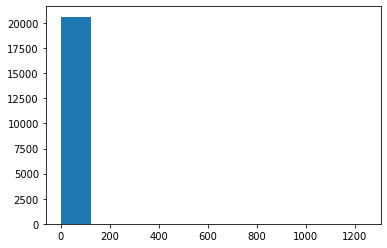

In [102]:
plt.hist(df['AveOccup'])

Almost every household has less than 150 members in the house

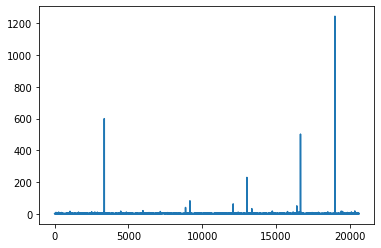

In [103]:
plt.plot(df['AveOccup'])

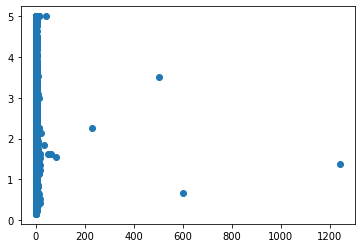

In [104]:
plt.scatter(df['AveOccup'], df['Target'])

Most of the household members were below 50 that contributed to the median prices

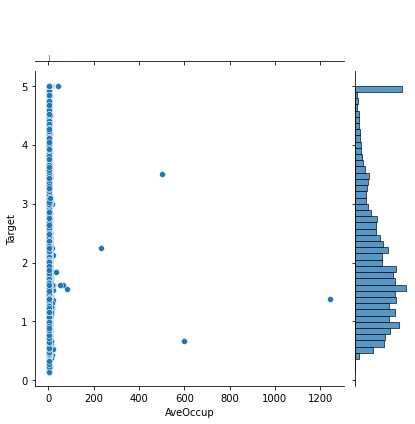

In [105]:
sns.jointplot(x=df['AveOccup'], y=df['Target'], data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


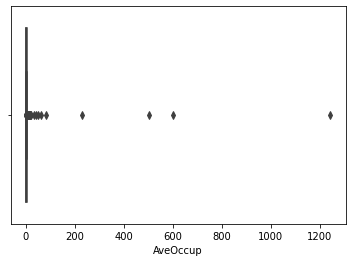

In [106]:
sns.boxplot(df['AveOccup'])

In [107]:
Q1 = df['AveOccup'].quantile(0.25)
Q3 = df['AveOccup'].quantile(0.75)
IQR = Q3 - Q1
((df['AveOccup'] < (Q1 - 1.5 * IQR)) | (df['AveOccup'] > (Q3 + 1.5 * IQR))).sum()

711

There are 711 outliers present in the average occupation

In [108]:
df[['AveOccup', 'Target']].groupby(['AveOccup', 'Target']).size().reset_index().sort_values(by=['AveOccup']).head()

,AveOccup,Target,0
0,0.692308,0.830,1
1,0.750000,3.500,1
2,0.970588,1.875,1
3,1.060606,1.750,1
4,1.066176,4.500,1


**Exploring Population**

In [109]:
df['Population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64

In [110]:
df['Population'].isnull().sum()

0

In [111]:
df['Population'].nunique()

3888

In [112]:
df[['Population', 'Target']].groupby(['Population', 'Target']).size().reset_index().sort_values(by=['Population'], ascending=False).head()

,Population,Target,0
20379,35682.0,1.344,1
20378,28566.0,1.188,1
20377,16305.0,1.537,1
20376,16122.0,3.663,1
20375,15507.0,2.539,1


(array([1.9816e+04, 7.1100e+02, 9.5000e+01, 1.2000e+01, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([3.00000e+00, 3.57090e+03, 7.13880e+03, 1.07067e+04, 1.42746e+04,
        1.78425e+04, 2.14104e+04, 2.49783e+04, 2.85462e+04, 3.21141e+04,
        3.56820e+04]),
 <a list of 10 Patch objects>)

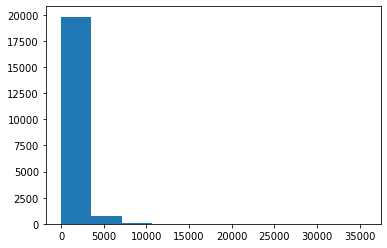

In [113]:
plt.hist(df['Population'])

Average number of population is less than 5000

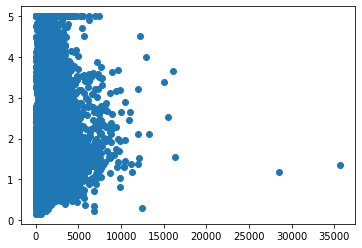

In [114]:
plt.scatter(df['Population'], df['Target'])

Most of the values that contributed to the target variable were less than 5000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


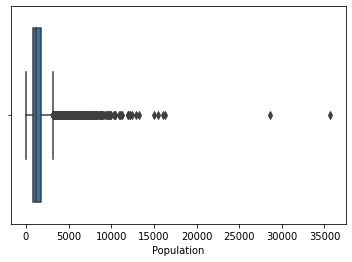

In [115]:
sns.boxplot(df['Population'])

There are many outliers present

In [116]:
Q1 = df['Population'].quantile(0.25)
Q3 = df['Population'].quantile(0.75)
IQR = Q3 - Q1
((df['Population'] < (Q1 - 1.5 * IQR)) | (df['Population'] > (Q3 + 1.5 * IQR))).sum()

1196

There are 1196 outliers present

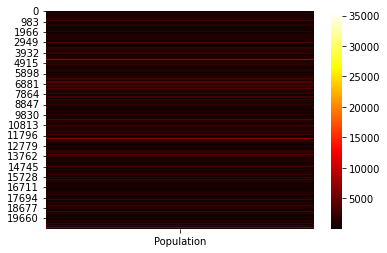

In [117]:
sns.heatmap(df[['Population']], cmap="hot")

**Handling Categorical data**

In [118]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Country        object
County         object
State          object
Road           object
City           object
Target        float64
dtype: object

There are 5 categorical values: Country, County, City, State, Road

***Exploring Country and State***

In [119]:
df['Country'].isnull().sum()

0

In [120]:
df['Country'].nunique()

2

In [121]:
df['Country'].unique()

array(['United States', 'México'], dtype=object)

In [122]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Country,County,State,Road,City,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,United States,Alameda County,California,Upper Side Hill entrance,Oakland,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,United States,Alameda County,California,Charing Cross Road,Oakland,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,United States,Alameda County,California,Grove Shafter Freeway,Oakland,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,United States,Alameda County,California,Florio Street,Oakland,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,United States,Alameda County,California,Florio Street,Oakland,3.422


In [123]:
df['State'].isnull().sum()

0

In [124]:
df['State'].unique()

array(['California', 'Nevada', 'Oregon', 'Arizona', 'Baja California'],
      dtype=object)

In [125]:
df['State'].value_counts()

California         20636
Nevada                 1
Oregon                 1
Arizona                1
Baja California        1
Name: State, dtype: int64

***Exploring County and Road***

In [126]:
df['County'].isnull().sum()

575

In [127]:
df['County'].nunique()

60

In [128]:
df['County'].value_counts()

Los Angeles County        5821
Orange County             1622
San Diego County          1609
Alameda County            1020
Santa Clara County        1003
San Bernardino County      830
Sacramento County          687
Contra Costa County        593
Riverside County           588
Fresno County              526
San Mateo County           447
San Joaquin County         418
Ventura County             384
Kern County                367
Sonoma County              314
Santa Barbara County       307
Stanislaus County          304
Tulare County              260
Monterey County            202
Solano County              199
Santa Cruz County          190
Marin County               167
Butte County               156
San Luis Obispo County     139
Placer County              133
Merced County              128
Humboldt County            127
Shasta County              121
El Dorado County           120
Imperial County            118
Napa County                103
Nevada County               96
Kings Co

In [129]:
df['Road'].isnull().sum()

1066

In [130]:
df['Road'].nunique()

9140

***Exploring City***

In [131]:
df['City'].isnull().sum()

7986

In [132]:
df['City'].nunique()

214

In [133]:
df['City'].value_counts()

Los Angeles      2309
San Diego         811
San Francisco     575
San Jose          479
Oakland           376
                 ... 
Sand City           1
Eastvale            1
Tijuana             1
Rainbow CDP         1
Portola             1
Name: City, Length: 214, dtype: int64

**Applying classification algorithm to find missing values of road**

In [134]:
df.index

RangeIndex(start=0, stop=20640, step=1)

In [135]:
len(df['Road'])

20640

In [136]:
missing_road_index = []
for i in range(len(df['Road'])):
  if df['Road'][i] == None:
    missing_road_index.append(i)

In [137]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Country', 'County', 'State', 'Road', 'City', 'Target'],
      dtype='object')

In [138]:
y_train_road = np.array([ df['Road'][i] for i in range(len(df['Road'])) if i not in missing_road_index ])

In [139]:
x_train_road = np.array([ [df['MedInc'][i], df['HouseAge'][i], df['AveRooms'][i], df['AveBedrms'][i], df['Population'][i], df['AveOccup'][i]] for i in range(len(df['Road'])) if i not in missing_road_index ])
x_test_road = np.array([ [df['MedInc'][i], df['HouseAge'][i], df['AveRooms'][i], df['AveBedrms'][i], df['Population'][i], df['AveOccup'][i]] for i in range(len(df['Road'])) if i in missing_road_index ])

In [140]:
model_road = SGDClassifier()
model_road.fit(x_train_road, y_train_road)
missing_road_pred = model_road.predict(x_test_road)

In [141]:
# Tried using Logistic Regression but iterations reached and took a lot of time

# from sklearn.linear_model import LogisticRegression
# missing_road_pred = LogisticRegression()
# missing_road_pred.fit(x_train_road, y_train_road)
# missing_road_pred.predict(x_test_road)

In [142]:
missing_road_pred

array(['McConnell Avenue', 'McConnell Avenue', 'McConnell Avenue', ...,
       'McConnell Avenue', 'McConnell Avenue', 'McConnell Avenue'],
      dtype='<U77')

In [143]:
np.unique(missing_road_pred)

array(['McConnell Avenue', 'Rice Canyon Road'], dtype='<U77')

In [144]:
np.count_nonzero(missing_road_pred)

1066

**Applying classification algorithm to find missing values of county**

In [145]:
len(df['County'])

20640

In [146]:
missing_county_index = []
for j in range(len(df['County'])):
  if df['County'][j] == None:
    missing_county_index.append(j)

In [147]:
y_train_county = np.array([ df['County'][i] for i in range(len(df['County'])) if i not in missing_county_index ])

In [148]:
x_train_county = np.array([ [df['MedInc'][i], df['HouseAge'][i], df['AveRooms'][i], df['AveBedrms'][i], df['Population'][i], df['AveOccup'][i]] for i in range(len(df['County'])) if i not in missing_county_index ])
x_test_county = np.array([ [df['MedInc'][i], df['HouseAge'][i], df['AveRooms'][i], df['AveBedrms'][i], df['Population'][i], df['AveOccup'][i]] for i in range(len(df['County'])) if i in missing_county_index ])

In [149]:
model_county = SGDClassifier()
model_county.fit(x_train_county, y_train_county)
missing_county_pred = model_county.predict(x_test_county)

In [150]:
missing_county_pred

array(['Los Angeles County', 'Los Angeles County', 'Los Angeles County',
       'Los Angeles County', 'Los Angeles County', 'Los Angeles County',
       'Los Angeles County', 'Los Angeles County', 'Los Angeles County',
       'Los Angeles County', 'Los Angeles County', 'Los Angeles County',
       'Los Angeles County', 'Los Angeles County', 'Los Angeles County',
       'Amador County', 'Los Angeles County', 'Los Angeles County',
       'Los Angeles County', 'Los Angeles County', 'Los Angeles County',
       'Los Angeles County', 'Los Angeles County', 'Los Angeles County',
       'Los Angeles County', 'Los Angeles County', 'Los Angeles County',
       'Los Angeles County', 'Los Angeles County', 'Los Angeles County',
       'Los Angeles County', 'Los Angeles County', 'Los Angeles County',
       'Los Angeles County', 'Los Angeles County', 'Los Angeles County',
       'Los Angeles County', 'Los Angeles County', 'Los Angeles County',
       'Los Angeles County', 'Los Angeles County', 'Los 

In [151]:
np.count_nonzero(missing_county_pred)

575

In [152]:
np.unique(missing_county_pred)

array(['Alameda County', 'Amador County', 'Contra Costa County',
       'Lassen County', 'Los Angeles County'], dtype='<U22')

In [153]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Country,County,State,Road,City,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,United States,Alameda County,California,Upper Side Hill entrance,Oakland,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,United States,Alameda County,California,Charing Cross Road,Oakland,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,United States,Alameda County,California,Grove Shafter Freeway,Oakland,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,United States,Alameda County,California,Florio Street,Oakland,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,United States,Alameda County,California,Florio Street,Oakland,3.422


**Applying classification algorithm to find missing values of city**

In [154]:
df.index

RangeIndex(start=0, stop=20640, step=1)

In [155]:
len(df['City'])

20640

In [156]:
missing_city_index = []
for i in range(len(df['City'])):
  if df['City'][i] == None:
    missing_city_index.append(i)

In [157]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Country', 'County', 'State', 'Road', 'City', 'Target'],
      dtype='object')

In [158]:
y_train_city = np.array([ df['City'][i] for i in range(len(df['City'])) if i not in missing_city_index ])

In [159]:
x_train_city = np.array([ [df['MedInc'][i], df['HouseAge'][i], df['AveRooms'][i], df['AveBedrms'][i], df['Population'][i], df['AveOccup'][i]] for i in range(len(df['City'])) if i not in missing_city_index ])
x_test_city = np.array([ [df['MedInc'][i], df['HouseAge'][i], df['AveRooms'][i], df['AveBedrms'][i], df['Population'][i], df['AveOccup'][i]] for i in range(len(df['City'])) if i in missing_city_index ])

In [160]:
model_city = SGDClassifier()
model_city.fit(x_train_city, y_train_city)
missing_city_pred = model_city.predict(x_test_city)

In [161]:
missing_city_pred

array(['Riverside', 'Riverside', 'Riverside', ..., 'Riverside',
       'Riverside', 'Riverside'], dtype='<U19')

In [162]:
np.unique(missing_city_pred)

array(['Downey', 'Irvine', 'Newport Beach', 'Oakland', 'Palo Alto',
       'Riverside', 'San Diego', 'San Francisco', 'San Mateo', 'Stockton',
       'Torrance', 'Vacaville'], dtype='<U19')

In [163]:
np.count_nonzero(missing_city_pred)

7986

**Updating the Country, State, Road and County column with predicted values and using Label Encoder**

In [164]:
missing_county_pred[10]

'Los Angeles County'

In [165]:
k = 0
for l in missing_road_index:
  df['Road'][l] = missing_road_pred[k]
  k += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [166]:
df['Road'].isnull().sum()

0

In [167]:
# To check if all values are correct or not in dataframe
o = 0
for c in missing_road_index:
  if(df['Road'][c] == missing_road_pred[o]):
    o += 1
    continue
  else:
    print("Not equal")

In [168]:
n = 0
for m in missing_county_index:
  df['County'][m] = missing_county_pred[n]
  n += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [169]:
df['County'].isnull().sum()

0

In [170]:
# To check if all values are correct or not in dataframe
p = 0
for c in missing_county_index:
  if(df['County'][c] == missing_county_pred[p]):
    p += 1
    continue
  else:
    print("Not equal")

In [171]:
n = 0
for m in missing_city_index:
  df['City'][m] = missing_city_pred[n]
  n += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [172]:
df['City'].isnull().sum()

0

In [173]:
# To check if all values are correct or not in dataframe
p = 0
for c in missing_city_index:
  if(df['City'][c] == missing_city_pred[p]):
    p += 1
    continue
  else:
    print("Not equal")

***Label Encoding***

In [174]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Country,County,State,Road,City,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,United States,Alameda County,California,Upper Side Hill entrance,Oakland,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,United States,Alameda County,California,Charing Cross Road,Oakland,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,United States,Alameda County,California,Grove Shafter Freeway,Oakland,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,United States,Alameda County,California,Florio Street,Oakland,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,United States,Alameda County,California,Florio Street,Oakland,3.422


In [175]:
le = LabelEncoder()

In [176]:
df['Road'] = le.fit_transform(df['Road'])

In [177]:
road ={}
for x in df['Road']:
  st = ""
  road[x] = le.inverse_transform([x])[0]
pickle.dump(road, open('road.pickle', 'wb'))

In [178]:
df['County'] = le.fit_transform(df['County'])

In [179]:
county ={}
for x in df['County']:
  st = ""
  county[x] = le.inverse_transform([x])[0]
pickle.dump(county, open('county.pickle', 'wb'))

In [180]:
df['Country'] = le.fit_transform(df['Country'])

In [181]:
df['State'] = le.fit_transform(df['State'])

In [182]:
df['City'] = le.fit_transform(df['City'])

In [183]:
city ={}
for x in df['City']:
  st = ""
  city[x] = le.inverse_transform([x])[0]
print(city)
pickle.dump(city, open('city.pickle', 'wb'))

{119: 'Oakland', 13: 'Berkeley', 149: 'Riverside', 147: 'Richmond', 71: 'Hayward', 59: 'Fremont', 157: 'San Francisco', 82: 'Jackson', 29: 'Chico', 156: 'San Diego', 125: 'Oroville', 3: 'Angels Camp', 18: 'Brentwood', 4: 'Antioch', 36: 'Concord', 135: 'Pleasant Hill', 206: 'Walnut Creek', 163: 'San Ramon', 188: 'Stockton', 39: 'Crescent City', 60: 'Fresno', 83: 'Kerman', 186: 'Squaw Valley', 123: 'Orange Cove', 146: 'Reedley', 75: 'Huron', 35: 'Coalinga', 124: 'Orland', 54: 'Eureka', 15: 'Blue Lake', 24: 'Calipatria', 209: 'Westmorland', 17: 'Brawley', 76: 'Imperial', 50: 'El Centro', 80: 'Irvine', 32: 'City of Bakersfield', 8: 'Bakersfield', 101: 'Maricopa', 192: 'Taft', 177: 'Shafter', 70: 'Hanford', 88: 'Lakeport', 33: 'Clearlake', 104: 'Middletown', 191: 'Susanville', 199: 'Vacaville', 65: 'Glendale', 97: 'Los Angeles', 21: 'Burbank', 132: 'Pasadena', 79: 'Inglewood', 171: 'Santa Monica', 28: 'Carson', 196: 'Torrance', 136: 'Pomona', 44: 'Diamond Bar', 205: 'Walnut', 208: 'West Cov

In [184]:
location = pickle.load(open("city.pickle", "rb"))
location.values()

dict_values(['Oakland', 'Berkeley', 'Riverside', 'Richmond', 'Hayward', 'Fremont', 'San Francisco', 'Jackson', 'Chico', 'San Diego', 'Oroville', 'Angels Camp', 'Brentwood', 'Antioch', 'Concord', 'Pleasant Hill', 'Walnut Creek', 'San Ramon', 'Stockton', 'Crescent City', 'Fresno', 'Kerman', 'Squaw Valley', 'Orange Cove', 'Reedley', 'Huron', 'Coalinga', 'Orland', 'Eureka', 'Blue Lake', 'Calipatria', 'Westmorland', 'Brawley', 'Imperial', 'El Centro', 'Irvine', 'City of Bakersfield', 'Bakersfield', 'Maricopa', 'Taft', 'Shafter', 'Hanford', 'Lakeport', 'Clearlake', 'Middletown', 'Susanville', 'Vacaville', 'Glendale', 'Los Angeles', 'Burbank', 'Pasadena', 'Inglewood', 'Santa Monica', 'Carson', 'Torrance', 'Pomona', 'Diamond Bar', 'Walnut', 'West Covina', 'Irwindale', 'Baldwin Park', 'El Monte', 'Bradbury', 'Arcadia', 'Sierra Madre', 'Downey', 'Norwalk', 'South Gate', 'Long Beach', 'La Palma', 'Calabasas', 'Lancaster', 'Palmdale', 'Santa Clarita', 'Chowchilla', 'Madera', 'San Rafael', 'San Mat

In [185]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Country,County,State,Road,City,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,1,0,2,8218,119,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,1,0,2,1530,119,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,1,0,2,3474,119,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,1,0,2,3095,119,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,1,0,2,3095,119,3.422


In [186]:
df['County'].nunique()

60

In [187]:
df['Road'].nunique()

9140

In [188]:
df['Country'].nunique()

2

In [189]:
df['State'].nunique()

5

In [190]:
df['City'].nunique()

214

**Feature Selection**

In [191]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Country', 'County', 'State', 'Road', 'City', 'Target'],
      dtype='object')


In [192]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Country       0
County        0
State         0
Road          0
City          0
Target        0
dtype: int64

In [193]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Country         int64
County          int64
State           int64
Road            int64
City            int64
Target        float64
dtype: object

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Country     20640 non-null  int64  
 7   County      20640 non-null  int64  
 8   State       20640 non-null  int64  
 9   Road        20640 non-null  int64  
 10  City        20640 non-null  int64  
 11  Target      20640 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 1.9 MB


In [195]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Country,County,State,Road,City,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,0.999952,28.195543,2.000000,4567.817442,127.770640,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,0.006961,14.255344,0.022012,2626.122854,43.869921,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.000000,0.000000,0.000000,0.000000,0.000000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.000000,20.000000,2.000000,2375.750000,97.000000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.000000,28.000000,2.000000,4776.000000,149.000000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,1.000000,39.000000,2.000000,6813.000000,149.000000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,1.000000,59.000000,4.000000,9139.000000,213.000000,5.000010


**Number of outliers in each column**

In [196]:
for x in df.columns:
  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)
  IQR = Q3 - Q1
  print(x,":", ((df[x] < (Q1 - 1.5 * IQR)) | (df[x] > (Q3 + 1.5 * IQR))).sum())

MedInc : 681
HouseAge : 0
AveRooms : 511
AveBedrms : 1424
Population : 1196
AveOccup : 711
Country : 1
County : 0
State : 4
Road : 0
City : 639
Target : 1071


Average bedrooms has the most number of outliers present followed by average population

In [197]:
cormat_new = df.corr()
cormat_new

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Country,County,State,Road,City,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.009541,0.045879,0.001276,-0.009181,0.029504,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011969,-0.250249,0.003323,-0.021254,-0.070965,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.005916,0.047761,-0.095528,-0.012145,0.067019,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.000639,-0.004334,-0.114369,-0.001087,0.034137,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,0.001466,0.040163,-0.000054,0.034654,-0.029587,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.000763,0.009609,-0.000281,0.002688,0.015206,-0.023737
Country,0.009541,0.011969,0.005916,0.000639,0.001466,-0.000763,1.000000,-0.000393,0.316235,0.008821,-0.010667,0.008406
County,0.045879,-0.250249,0.047761,-0.004334,0.040163,0.009609,-0.000393,1.000000,-0.002934,0.022485,0.288167,-0.004978
State,0.001276,0.003323,-0.095528,-0.114369,-0.000054,-0.000281,0.316235,-0.002934,1.000000,0.012666,-0.003011,0.001240
Road,-0.009181,-0.021254,-0.012145,-0.001087,0.034654,0.002688,0.008821,0.022485,0.012666,1.000000,-0.015656,-0.009894


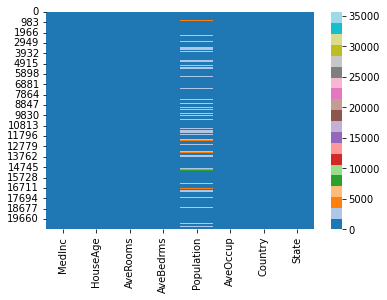

In [198]:
sns.heatmap(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Country', 'State']], cmap='tab20')

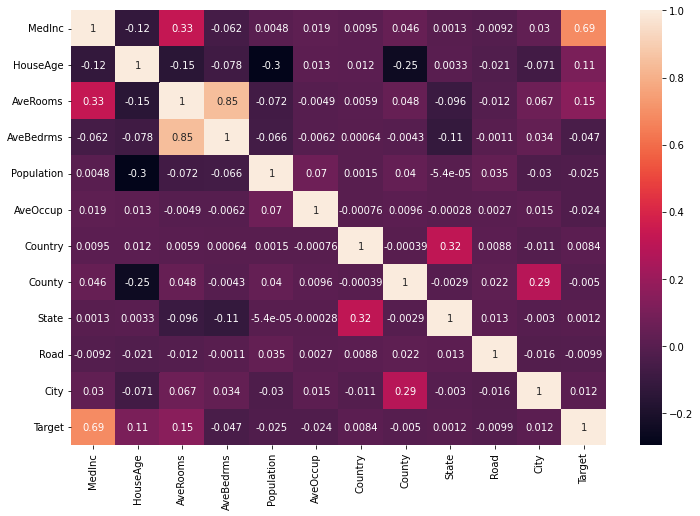

In [199]:
plt.figure(figsize = (12,8))
sns.heatmap(cormat_new, annot=True)

1. Correlation between avebedrms and averooms is very high(0.85), we will remove one of them as it means that these are almost same
2. Correlation between State and Country wrt target is very low

In [200]:
def correlation(dataset, threshold):
  col_corr = set()  # Set of all the names of correlated columns
  for i in range(len(cormat_new.columns)):
    for j in range(i):
      if abs(cormat_new.iloc[i, j]) > threshold: # we are interested in absolute coeff value
        colname = cormat_new.columns[i]  # getting the name of column
        col_corr.add(colname)
  return col_corr

In [201]:
corr_features = correlation(df, 0.7) # 0.7 is the threshold value (assumed). Any correl value above this will be considered strongly correlation and we can remove the feature
corr_features

{'AveBedrms'}

In [202]:
df_new = df.copy()

In [203]:
drop_columns = ['Country', 'State', 'AveRooms']
df_new.drop(labels=drop_columns, axis=1, inplace=True)

**Developing model**

***Splitting our data into train and test***

In [204]:
df_new.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,County,Road,City,Target
0,8.3252,41.0,1.023810,322.0,2.555556,0,8218,119,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,0,1530,119,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,0,3474,119,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,0,3095,119,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,0,3095,119,3.422


In [205]:
size = len(df_new.columns)-1
size

8

In [206]:
df_new.iloc[:, :size].columns

Index(['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup', 'County',
       'Road', 'City'],
      dtype='object')

In [207]:
df_new.iloc[:, -1].values

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [208]:
x = df_new.iloc[:, :size].values
y = df_new.iloc[:, -1].values

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 42)

In [210]:
x_train

array([[3.25960000e+00, 3.30000000e+01, 1.00642055e+00, ...,
        3.90000000e+01, 6.93700000e+03, 1.56000000e+02],
       [3.81250000e+00, 4.90000000e+01, 1.04100529e+00, ...,
        2.00000000e+01, 1.73900000e+03, 9.50000000e+01],
       [4.15630000e+00, 4.00000000e+00, 9.85119048e-01, ...,
        4.30000000e+01, 8.65800000e+03, 1.49000000e+02],
       ...,
       [2.93440000e+00, 3.60000000e+01, 1.07969639e+00, ...,
        2.00000000e+01, 3.00600000e+03, 1.49000000e+02],
       [5.71920000e+00, 1.50000000e+01, 1.06797853e+00, ...,
        0.00000000e+00, 1.67000000e+03, 5.90000000e+01],
       [2.57550000e+00, 5.20000000e+01, 1.05877617e+00, ...,
        2.00000000e+01, 1.90000000e+01, 1.57000000e+02]])

In [211]:
x_train.shape

(16512, 8)

In [212]:
y_train

array([1.03 , 3.821, 1.726, ..., 2.221, 2.835, 3.25 ])

In [213]:
y_train.shape

(16512,)

In [214]:
x_test

array([[1.68120000e+00, 2.50000000e+01, 1.02228412e+00, ...,
        5.50000000e+01, 2.58600000e+03, 1.38000000e+02],
       [2.53130000e+00, 3.00000000e+01, 1.19349315e+00, ...,
        1.50000000e+01, 4.67600000e+03, 1.92000000e+02],
       [3.48010000e+00, 5.20000000e+01, 1.18587747e+00, ...,
        2.00000000e+01, 1.57100000e+03, 1.57000000e+02],
       ...,
       [9.22980000e+00, 2.50000000e+01, 9.47183099e-01, ...,
        4.40000000e+01, 6.36900000e+03, 4.00000000e+01],
       [2.78500000e+00, 3.60000000e+01, 9.83122363e-01, ...,
        1.00000000e+01, 4.30000000e+02, 1.49000000e+02],
       [3.55210000e+00, 1.70000000e+01, 1.03348214e+00, ...,
        2.00000000e+01, 6.89200000e+03, 9.70000000e+01]])

In [215]:
x_test.shape

(4128, 8)

In [216]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [217]:
y_test.shape

(4128,)

***Creating and Evaluating model***

*Since the target variable is a numerical data, so we will use a regression model.*

***Hyper-parameter tuning to find out best parameters (using randomized search CV)***

In [218]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [219]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [220]:
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  21.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  21.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [221]:
para = rf_random.best_params_

In [222]:
para['max_features']

'sqrt'

In [223]:
def best_model():
  model = RandomForestRegressor(max_depth=para['max_depth'],
          max_features=para['max_features'],
          min_samples_leaf= para['min_samples_leaf'],
          min_samples_split= para['min_samples_split'],
          n_estimators=para['n_estimators'])
  model.fit(x_train, y_train)
  y_pred_random = model.predict(x_test)
  print("---------------RANDOM FOREST---------------")
  print("Training Score:", model.score(x_train, y_train))
  print("Test Score:", model.score(x_test, y_test))
  print("R2:",r2_score(y_test, y_pred_random))
  print('MAE: ', mean_absolute_error(y_test, y_pred_random))
  print('MSE: ', mean_squared_error(y_test, y_pred_random)) 

  linreg=LinearRegression()
  linreg.fit(x_train, y_train)
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
  y_predict_linear = linreg.predict(x_test)
  print("---------------LINEAR REGRESSION---------------")
  print("Training Score:", linreg.score(x_train, y_train))
  print("Test Score:", linreg.score(x_test, y_test))
  print("R2",(r2_score(y_test, y_predict_linear)))
  print('MAE: ', mean_absolute_error(y_test, y_predict_linear))
  print("MSE:", (mean_squared_error(y_test, y_predict_linear)))

  dtreg=DecisionTreeRegressor()
  dtreg.fit(x_train, y_train)
  y_predict_dtree = dtreg.predict(x_test)
  print("---------------DECISION TREE---------------")
  print("Training Score:", dtreg.score(x_train, y_train))
  print("Test Score:", dtreg.score(x_test, y_test))
  print("R2:", (r2_score(y_test, y_predict_dtree)))
  print('MAE: ', mean_absolute_error(y_test, y_predict_dtree))
  print("MSE:", (mean_squared_error(y_test, y_predict_dtree)))

  lassoreg=Lasso(alpha=0.001,normalize=True)
  lassoreg.fit(x_train, y_train)
  y_predict_lasso = lassoreg.predict(x_test)
  print("---------------LASSO REGRESSION---------------")
  print("Training Score:", lassoreg.score(x_train, y_train))
  print("Test Score:", lassoreg.score(x_test, y_test))
  print("R2:", (r2_score(y_test, y_predict_lasso)))
  print('MAE: ', mean_absolute_error(y_test, y_predict_lasso))
  print("MSE:", (mean_squared_error(y_test, y_predict_lasso)))

  ridgereg=Ridge(alpha=0.001,normalize=True)
  ridgereg.fit(x_train, y_train)
  y_predict_ridge = ridgereg.predict(x_test)
  print("---------------RIDGE REGRESSION---------------")
  print("Training Score:", ridgereg.score(x_train, y_train))
  print("Test Score:", ridgereg.score(x_test, y_test))
  print("R2:", (r2_score(y_test, y_predict_ridge)))
  print('MAE: ', mean_absolute_error(y_test, y_predict_ridge))
  print("MSE:", (mean_squared_error(y_test, y_predict_ridge)))

  return model

In [224]:
x = best_model()

---------------RANDOM FOREST---------------
Training Score: 0.9702335259931536
Test Score: 0.7759705385653521
R2: 0.7759705385653521
MAE:  0.37355546314625493
MSE:  0.293570217654436
---------------LINEAR REGRESSION---------------
Training Score: 0.5160005171221365
Test Score: 0.4959913787197783
R2 0.4959913787197783
MAE:  0.6034775289544101
MSE: 0.6604574224364198
---------------DECISION TREE---------------
Training Score: 1.0
Test Score: 0.5544680347411329
R2: 0.5544680347411329
MAE:  0.5074929093992249
MSE: 0.583829087368532
---------------LASSO REGRESSION---------------
Training Score: 0.4846511765971043
Test Score: 0.46923486657836044
R2: 0.46923486657836044
MAE:  0.6315912108402187
MSE: 0.6955193961729454
---------------RIDGE REGRESSION---------------
Training Score: 0.5159998758068076
Test Score: 0.49602212000975565
R2: 0.49602212000975565
MAE:  0.6035299763600043
MSE: 0.6604171387740309


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

In [225]:
print(x)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)


**From the above, we can see that random forest regressor works the best**

In [226]:
pickle.dump(x, lzma.open('model.pickle', 'wb'), 4)

In [227]:
cls = pickle.load(lzma.open("model.pickle", "rb"))

In [228]:
print(cls)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)


In [229]:
cls.predict([[8.3014,	21.0, 0.971880, 2401.0, 2.109842, 0, 1530, 119]])

array([3.6806437])